In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [64]:
dataset=pd.read_csv('Iris.csv')
dataset=pd.DataFrame(dataset)
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [65]:
dataset.shape

(12528, 9)

In [66]:
dataset.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [80]:
dataset[' Skewness of the DM-SNR curve'].fillna(dataset[' Skewness of the DM-SNR curve'].mode()[0],inplace=True)

In [76]:
dataset[' Standard deviation of the DM-SNR curve'].fillna(dataset[' Standard deviation of the DM-SNR curve'].mean(),inplace=True)

In [77]:
dataset[' Excess kurtosis of the integrated profile'].fillna(dataset[' Excess kurtosis of the integrated profile'].mean(),inplace=True)

<Axes: >

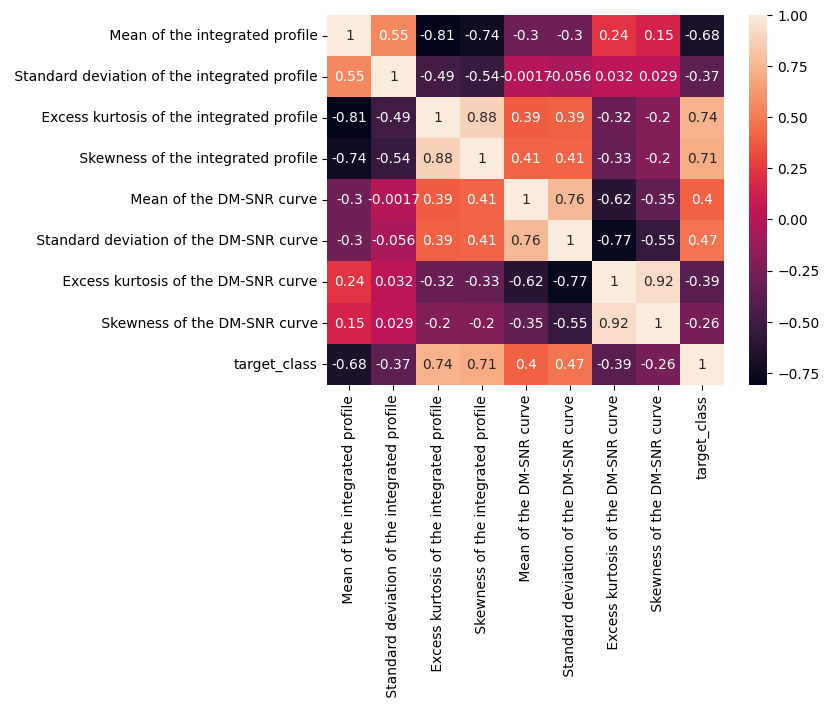

In [78]:
sns.heatmap(dataset.corr(),annot=True)

In [81]:
dataset.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [86]:
X=dataset.drop(columns=['target_class',' Skewness of the DM-SNR curve'],axis=1)
Y=dataset["target_class"]

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [88]:
from sklearn.svm import SVC  
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


In [89]:
print("accuracy score is ",metrics.accuracy_score(Y_test,Y_pred))
print("Confusion matrix is :",metrics.confusion_matrix(Y_test,Y_pred))
print("F1 square error is :",metrics.f1_score(Y_test,Y_pred))

accuracy score is  0.9764565043894653
Confusion matrix is : [[2269   10]
 [  49  178]]
F1 square error is : 0.8578313253012049


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("d:\ML\loan-predictionUC.csv (3).xlsx")
df=pd.DataFrame(df)

if "Self_Employed" in df.columns:
    df["Self_Employed"].fillna("No", inplace=True)

print(df.isnull().sum())
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

label_encode=LabelEncoder()
df["Married"]=label_encode.fit_transform(df["Married"] )
df["Loan_Status"]=label_encode.fit_transform(df["Loan_Status"] )
df["Loan_ID"]=label_encode.fit_transform(df["Loan_ID"] )
df["Gender"]=label_encode.fit_transform(df["Gender"])
df["Education"]=label_encode.fit_transform(df["Education"])
df["Property_Area"]=label_encode.fit_transform(df["Property_Area"])
df["Self_Employed"]=label_encode.fit_transform(df["Self_Employed"])
df["Dependents"]=df["Dependents"].replace(to_replace="3+",value=5)
X = df.iloc[:, :-1] 
 # Features
y = df.iloc[:, -1]   # Target variable
X=X.drop(columns=["Loan_ID"],axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" ,accuracy)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           5          0